### import

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

Welcome to JupyROOT 6.26/04


# 2D

In [2]:
#base_file_loc = '/media/jykim/T7/storage/01_recon/new_sigext_cuts_skim_1ab_inv_bkg_sig/'
# base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_pi0veto/'
base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_400invfb/'

base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract_400fb/'
base_file_loc = '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_sig_bkg/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/train_v6_beambkg_sig_ext/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v6_pre_ext_omega_const_wide_Q/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/'


# phigamma_ccbar = base_file_loc + 'topo/skim_1abinv_phi_D0_M/topoana.root'
phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'

base_filter=' Pi0_Prob<0.85 && Pis_charge==+1 && D0_M>1.67 && D0_M<2.06 '
base_filter=' phi_rank_Dstp==1 && Dstarp_CMS_p>2.49 && Pi0_Prob<0.9  && D0_M>1.67 && D0_M<2.06 && abs(D0_cosHel_0)<=1'


base_filter='Belle2Pi0Veto_75MeV > 0.022 && D0_M>1.67 && D0_M<2.06  '

# base_filter=' Pi0_Prob<0.90 && Pis_charge==-1 && D0_M>1.72 && D0_M<2.01 '

#base_filter='Pi0_Prob<0.90  && D0_M>1.67 && D0_M<2.06 '

# base_filter='Pi0_Prob<0.95 && phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'

#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '


#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0']
# tree='antiKstar_cc'
tree='rho'

In [3]:
# pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=topo_variables)
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)

pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [4]:
phigamma_generic=pd.concat([pd_phigamma_ccbar,
                           pd_phigamma_uubar,
                           pd_phigamma_ddbar,
                           pd_phigamma_ssbar,
                           pd_phigamma_charged,
                           pd_phigamma_mixed,
                           pd_phigamma_taupair],ignore_index=True)

In [5]:
ccbar_file = "/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_rho/standard.root"
pd_only_ccbar = get_pd(file=ccbar_file, tree=tree,base_filter=base_filter,variables=variables)

D0_M_pd_data = pd_only_ccbar['D0_M']
D0_cosHel_0_pd_data = pd_only_ccbar['D0_cosHel_0']

D0_M_np_data = D0_M_pd_data.to_numpy()
D0_cosHel_0_np_data = D0_cosHel_0_pd_data.to_numpy()

In [6]:
# D0_M_pd_data = phigamma_generic['D0_M']
# D0_cosHel_0_pd_data = phigamma_generic['D0_cosHel_0']

# D0_M_np_data = D0_M_pd_data.to_numpy()
# D0_cosHel_0_np_data = D0_cosHel_0_pd_data.to_numpy()

In [7]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

94456269155856

(MyPdf_xsquared_nopara) An instance of MyPdf_xsquared_nopara.


In [8]:
# ROOT.RooClassFactory.makePdf("MyPdf_one_minus_squared", "y", "", "1-y*y")
ROOT.gROOT.ProcessLineSync(".x MyPdf_one_minus_squared.cxx+")

94456383528048

(MyPdf_one_minus_squared) An instance of MyPdf_one_minus_squared.


[#0] WARNING:InputArguments -- The parameter 'x_bkg2_sigma1' with range [0, 0.5] of the RooGaussian 'x_bkg2_1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'y_bkg1_sigma1' with range [0, 0.2] of the RooGaussian 'y_bkg1_2' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'y_bkg1_sigma2' with range [0, 0.2] of the RooGaussian 'y_bkg1_3' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'y_bkg2_sigma1' with range [0, 0.2] of the RooGaussian 'y_bkg2_1' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(y_sig_model_Int[cos#theta_{H}]) using numeric integrator RooIntegrator1D to calculate Int(cos#theta_{H})
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test2_x_D0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test2_y_D0.png has been created


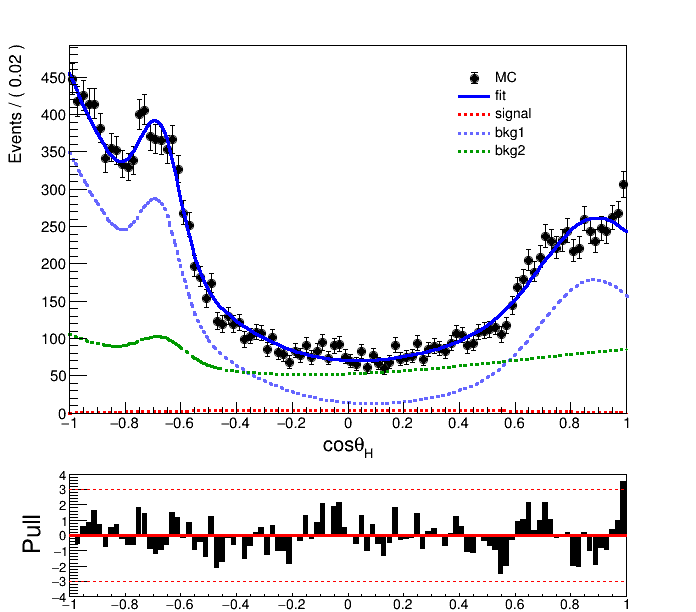

In [27]:
file1_name="test2_x_D0.png"
file2_name="test2_y_D0.png"


####################
#D0_M
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.67, 2.06, "")
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.72, 2.01, "")

# x.setBins(50)

#### Construct signal model for x
x_sig_mean = ROOT.RooRealVar("x_sig_mean", "mean of gaussians", 1.863,1.86, 1.88)
x_sig_sigma1 = ROOT.RooRealVar("x_sig_sigma1", "width of gaussians", 0.01,0.005,0.02)
x_sig_sigma2 = ROOT.RooRealVar("x_sig_sigma2", "width of gaussians", 0.01,0.005,0.02)
x_sig_alpha = ROOT.RooRealVar("x_sig_alpha", "width of gaussians", 5,2,10)
x_sig_n_CB = ROOT.RooRealVar("x_sig_n_CB", "width of gaussians", 5,1,10)

x_sig_1 = ROOT.RooGaussian("x_sig_1", "Signal component 1", x, x_sig_mean, x_sig_sigma1)
x_sig_2 = ROOT.RooCBShape("x_sig_2", "Signal component 2", x, x_sig_mean, x_sig_sigma2, x_sig_alpha, x_sig_n_CB)

x_sigfrac = ROOT.RooRealVar("x_sigfrac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)

x_sig_model = ROOT.RooAddPdf("x_sig_model", "model", [x_sig_1, x_sig_2], x_sigfrac)

#### Construct bkg model for x
#V pi0
x_bkg1_sigma1 = ROOT.RooRealVar("x_bkg1_sigma1", "width of gaussians", 0.03,0,0.5)
x_bkg1_alpha = ROOT.RooRealVar("x_bkg1_alpha", "width of gaussians",  0.2,0.,5)
x_bkg1_n_CB = ROOT.RooRealVar("x_bkg1_n_CB", "width of gaussians", 3,0,10)
x_bkg1_mean = ROOT.RooRealVar("x_bkg1_mean", "mean of gaussians", 1.83,1.82, 1.85)

x_bkg1_model = ROOT.RooCBShape("x_bkg1_model", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma1, x_bkg1_alpha, x_bkg1_n_CB)

####BKG2
# remaining
x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "mean of gaussians", 1.6,1.4, 1.67)
x_bkg2_sigma1 = ROOT.RooRealVar("x_bkg2_sigma1", "width of gaussians", 0.03,0,0.5)
x_bkg2_tau = ROOT.RooRealVar("x_bkg2_tau", "tau",-2, -5,0)

x_bkg2_1 = ROOT.RooGaussian("x_bkg2_1", "Signal component 1", x, x_bkg2_mean, x_bkg2_sigma1)
x_bkg2_2 = ROOT.RooExponential("x_bkg2_2", "Signal component 1", x, x_bkg2_tau) 
x_bkg2frac = ROOT.RooRealVar("x_bkg2frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)

x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "model", [x_bkg2_1, x_bkg2_2], x_bkg2frac)

#phipi0,Kshort K+k-
####BKG3
# x_bkg3_mean = ROOT.RooRealVar("x_bkg3_mean", "mean of gaussians", 1.65,1.58, 1.68)
# x_bkg3_sigma1 = ROOT.RooRealVar("x_bkg3_sigma1", "width of gaussians", 0.01,0,0.08)

# x_bkg3_model = ROOT.RooGaussian("x_bkg3_model", "Signal component 1", x,x_bkg3_mean, x_bkg3_sigma1)
#x_bkg3_mean = ROOT.RooRealVar("x_bkg3_mean", "mean of gaussians", 1.65,1.58, 1.7)
#x_bkg3_sigma1 = ROOT.RooRealVar("x_bkg3_sigma1", "width of gaussians", 0.01,0,0.07)


# x_bkg3_c0 = ROOT.RooRealVar("x_bkg3_c0", "c0",0.1, 0,1.)
# # c1 = ROOT.RooRealVar("c1", "c1",0.5, 0,1.)
# # c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
# x_bkg3_1 = ROOT.RooPolynomial("x_bkg3_1", "Signal component 1", x, ROOT.RooArgList(x_bkg3_c0), lowestOrder=1)
    
# x_bkg3_tau = ROOT.RooRealVar("x_bkg3_tau", "tau",-2, -20,0)
# x_bkg3_2 = ROOT.RooExponential("x_bkg3_2", "Signal component 1", x, x_bkg3_tau)    

#x_bkg3_2 = ROOT.RooGaussian("x_bkg3_2", "Signal component 1", x, x_bkg3_mean, x_bkg3_sigma1)


# x_bkg3frac1  = ROOT.RooRealVar("x_bkg3frac1", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
# x_bkg3_model = ROOT.RooAddPdf("x_bkg3_model", "Signal1", [x_bkg3_1, x_bkg3_2], x_bkg3frac1)

################
#D0_cosHel_0
yrange=(-1,1)
# yrange=(-0.8,0.8)

# yrange=(-0.,1)

y = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", yrange[0], yrange[1], "")
# y.setBins(50)

y_sig_model = ROOT.MyPdf_one_minus_squared("y_sig_model", "y_sig", y)


#### Construct bkg model for y
#V pi0
y_bkg1_mean1 = ROOT.RooRealVar("y_bkg1_mean1", "mean of gaussians", -0.7,-0.8, -0.6)
y_bkg1_mean2 = ROOT.RooRealVar("y_bkg1_mean2", "mean of gaussians", 0.9,0.8, 1.2)

y_bkg1_sigma1 = ROOT.RooRealVar("y_bkg1_sigma1", "width of gaussians", 0.03,0,0.2)
y_bkg1_sigma2 = ROOT.RooRealVar("y_bkg1_sigma2", "width of gaussians", 0.1,0,0.2)


y_bkg1_Cheby_c0 = ROOT.RooRealVar("y_bkg1_Cheby_c0", "c0",0.2, -1,1)
y_bkg1_Cheby_c1 = ROOT.RooRealVar("y_bkg1_Cheby_c1", "c0",0.2, -1,1)
y_bkg1_Cheby_c2 = ROOT.RooRealVar("y_bkg1_Cheby_c2", "c0",-0.2, -1,1)


# y_bkg1_1 = ROOT.MyPdf_xsquared_nopara("sig1", "y_bkg1", y)
y_bkg1_2 = ROOT.RooGaussian("y_bkg1_2", "Signal component 1", y, y_bkg1_mean1, y_bkg1_sigma1)
y_bkg1_3 = ROOT.RooGaussian("y_bkg1_3", "Signal component 1", y, y_bkg1_mean2, y_bkg1_sigma2)
y_bkg1_4 = ROOT.RooChebychev("y_bkg1_4", "Signal component 1", y, ROOT.RooArgList(y_bkg1_Cheby_c0, y_bkg1_Cheby_c1, y_bkg1_Cheby_c2))


# y_bkg1frac_1 = ROOT.RooRealVar("y_bkg1frac_1", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
y_bkg1frac_2 = ROOT.RooRealVar("y_bkg1frac_2", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
y_bkg1frac_3 = ROOT.RooRealVar("y_bkg1frac_3", "fraction of component 1 in signal", 0.5, 0.0, 1.0)

# y_bkg1_added_1 = ROOT.RooAddPdf("y_bkg1_added_1", "model", [y_bkg1_1, y_bkg1_2], y_bkg1frac_1)
y_bkg1_added_2 = ROOT.RooAddPdf("y_bkg1_added_2", "model", [y_bkg1_3, y_bkg1_2], y_bkg1frac_2)

y_bkg1_model = ROOT.RooAddPdf("y_bkg1_model", "model", [y_bkg1_4, y_bkg1_added_2], y_bkg1frac_3)



# y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)

#remaining
y_bkg2_mean1 = ROOT.RooRealVar("y_bkg2_mean1", "mean of gaussians", -0.7,-0.8, -0.6)
y_bkg2_sigma1 = ROOT.RooRealVar("y_bkg2_sigma1", "width of gaussians", 0.03,0,0.2)

y_bkg2_Cheby_c0 = ROOT.RooRealVar("y_bkg2_Cheby_c0", "c0",0.2, -1,1)
y_bkg2_Cheby_c1 = ROOT.RooRealVar("y_bkg2_Cheby_c1", "c0",0.2, -1,1)
y_bkg2_Cheby_c2 = ROOT.RooRealVar("y_bkg2_Cheby_c2", "c0",-0.2, -1,1)

y_bkg2_1 = ROOT.RooGaussian("y_bkg2_1", "Signal component 1", y, y_bkg2_mean1, y_bkg2_sigma1)
y_bkg2_2 = ROOT.RooChebychev("y_bkg2_2", "Signal component 1", y, ROOT.RooArgList(y_bkg2_Cheby_c0, y_bkg2_Cheby_c1, y_bkg2_Cheby_c2))


y_bkg2frac = ROOT.RooRealVar("y_bkg2frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
y_bkg2_model = ROOT.RooAddPdf("y_bkg2_model", "model", [y_bkg2_1, y_bkg2_2], y_bkg2frac)


# y_bkg2_model= ROOT.RooPolynomial("y_bkg2_model", "Signal component 1", y, ROOT.RooArgList(y_bkg2_c0, y_bkg2_c1))

####BKG3
# y_bkg3_c0 = ROOT.RooRealVar("y_bkg3_c0", "c0",0.1, 0,1.)
# y_bkg3_c1 = ROOT.RooRealVar("y_bkg3_c1", "c1",0.5, 0,1.)
# y_bkg3_c2 = ROOT.RooRealVar("y_bkg3_c2", "c2",-0.3, -1.,0.)
# y_bkg3_model = ROOT.RooChebychev("y_bkg3_model", "Signal component 1", y, ROOT.RooArgList(y_bkg3_c0, y_bkg3_c1, y_bkg3_c2))
# y_bkg3_model = ROOT.MyPdf_xsquared_nopara("y_bkg3_model", "y_bkg3", y)

#### Combine bkg models
# y_phipi0frac = ROOT.RooRealVar("y_phipi0frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
# y_bkg_model = ROOT.RooAddPdf("y_bkg_model", "Signal", [y_bkg1_model, y_bkg2_model], y_phipi0frac)


################
bkg1_xy_model = ROOT.RooProdPdf("bkg1_xy_model","bkg1_xy_model",ROOT.RooArgSet(x_bkg1_model,y_bkg1_model))
bkg2_xy_model = ROOT.RooProdPdf("bkg2_xy_model","bkg2_xy_model",ROOT.RooArgSet(x_bkg2_model,y_bkg2_model))
# bkg3_xy_model = ROOT.RooProdPdf("bkg3_xy_model","bkg3_xy_model",ROOT.RooArgSet(x_bkg3_model,y_bkg3_model))


sig_model = ROOT.RooProdPdf("sig_model","sig_xy_model",ROOT.RooArgSet(x_sig_model, y_sig_model))


####################################
# construct signal + bkg pdf
nsig = ROOT.RooRealVar("nsig","# signal events",100,0,len(D0_M_np_data))
nbkg1 = ROOT.RooRealVar("nbkg1","# bkg events",600,0, len(D0_M_np_data))
nbkg2 = ROOT.RooRealVar("nbkg2","# bkg events",300,0, len(D0_M_np_data))
# nbkg3 = ROOT.RooRealVar("nbkg3","# bkg events",100,0, len(D0_M_np_data))

# nbkg3 = ROOT.RooRealVar("nbkg3","# bkg events",300,0., len(D0_M_np_data))


# extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model,bkg3_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2, nbkg3))
extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2))

#####################################
# # Associated nsig/nbkg as expected number of events with sig/bkg
# esig = ROOT.RooExtendPdf("esig", "extended signal pdf", sig_xy_model, nsig)
# ebkg = ROOT.RooExtendPdf("ebkg", "extended background pdf", bkg_xy_model, nbkg)
 
# # Sum extended components without coefs
# # -------------------------------------------------------------------------
 
# # Construct sum of two extended pdf (no coefficients required)
# extended_model = ROOT.RooAddPdf("extended_model", "bkg_sig", [ebkg, esig ])


# datax = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])
# datay = ROOT.RooDataSet.from_numpy({"cos#theta_{H}": np_data['D0_cosHel_0']}, [y])

data = ROOT.RooDataSet.from_numpy({"M(D^{0})": D0_M_np_data, "cos#theta_{H}": D0_cosHel_0_np_data}, [x,y])

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    # r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
# r = sig_xy_model.fitTo(data,NumCPU=12, Range=(1.70,1.98))
# r = extended_model.fitTo(data,NumCPU=12, Extended=ROOT.kTRUE)
r = extended_model.fitTo(data,NumCPU=12, Extended=ROOT.kTRUE,PrintLevel=-1, Save=1, )


    # r.Print()
canv.cd(1) 
#     frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

    # sig1.plotOn(frame, LineStyle="--", LineColor="r")
    # sig2.plotOn(frame, LineStyle="--", LineColor="r")
# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

# sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")
extended_model.plotOn(frame, Name="fitx_sig", Components=x_sig_model, LineStyle=ROOT.kDashed, LineColor='r')
# extended_model.plotOn(frame, Name="fitx_bkg", Components=ROOT.RooArgSet(x_bkg1_model,x_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
extended_model.plotOn(frame, Name="fitx_bkg1", Components=x_bkg1_model, LineStyle=ROOT.kDashed, LineColor=593)
extended_model.plotOn(frame, Name="fitx_bkg2", Components=x_bkg2_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
# extended_model.plotOn(frame, Name="fitx_bkg3", Components=x_bkg3_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+10)



# extended_model.plotOn(frame, Name="fitx1", Components=x_bkg2_model, LineStyle=ROOT.kDashed, LineColor=593)

# extended_model.plotOn(frame, Name="fitx2", Components=x_sig_3, LineStyle=ROOT.kDashed, LineColor='r')
#sig_xy_model.plotOn(frame, Name="fitx3", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

extended_model.plotOn(frame,Name="fitting")
frame.Draw("PE")

    # sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
    


leg1 = ROOT.TLegend(0.65, 0.65, 0.9, 0.85)
# leg1.SetFillColor(ROOT.kWhite)
leg1.SetFillColor(0)

    # leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.AddEntry("fitx_sig", "signal", "l")
leg1.AddEntry("fitx_bkg1", "bkg1", "l")
leg1.AddEntry("fitx_bkg2", "bkg2", "l")
# leg1.AddEntry("fitx_bkg3", "bkg3", "l")

# leg1.SetTextSize(0.05)
# leg1.SetTextAlign(13)

leg1.SetBorderSize(0)
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
    # pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
    # pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.67)
xmax1 = ctypes.c_double(2.06)
    # xmin1 = 0.1
    # xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs(file1_name)

#######################################
canv2 = ROOT.TCanvas("Canvas", "Canvas", 700, 640)
# canv2.cd()
y_xlow = ctypes.c_double()
y_ylow = ctypes.c_double()
y_xup = ctypes.c_double()
y_yup = ctypes.c_double()

canv2.GetPad(0).GetPadPar(y_xlow, y_ylow, y_xup, y_yup)
canv2.Divide(1,2)

y_xlow = y_xlow.value
y_ylow = y_ylow.value
y_xup = y_xup.value
y_yup = y_yup.value

y_upPad = canv2.GetPad(1)
y_upPad.SetPad(y_xlow, y_ylow+0.25*(y_yup-y_ylow),y_xup,y_yup)

y_dwPad = canv2.GetPad(2)
y_dwPad.SetPad(y_xlow, y_ylow,y_xup,y_ylow+0.25*(y_yup-y_ylow))


yframe = y.frame(Title=" ")
canv2.cd(1) 
data.plotOn(yframe,Name = "data2", XErrorSize=0)

    # sig1.plotOn(frame, LineStyle="--", LineColor="r")
    # sig2.plotOn(frame, LineStyle="--", LineColor="r")
# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

# sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")

extended_model.plotOn(yframe, Name="fity_sig", Components=y_sig_model, LineStyle=ROOT.kDashed, LineColor='r')
extended_model.plotOn(yframe, Name="fity_bkg1", Components=ROOT.RooArgSet(y_bkg1_model), LineStyle=ROOT.kDashed, LineColor=593)
extended_model.plotOn(yframe, Name="fity_bkg2", Components=ROOT.RooArgSet(y_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
# extended_model.plotOn(yframe, Name="fity_bkg3", Components=ROOT.RooArgSet(y_bkg3_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+10)

# extended_model.plotOn(yframe, Name="fity_bkg", Components=ROOT.RooArgSet(y_bkg1_model,y_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
# extended_model.plotOn(yframe, Name="fity_bkg", Components=ROOT.RooArgSet(y_bkg1_model,y_bkg2_model,y_bkg3_model), LineStyle=ROOT.kDashed, LineColor=593)

#sig_xy_model.plotOn(yframe, Name="fit3", Components=sigy3, LineStyle=ROOT.kDashed, LineColor=593)



extended_model.plotOn(yframe,Name="fitting2")



yframe.Draw("PE")

    # sig.paramOn(frame)
yframe.GetXaxis().SetTitleSize(0.047)
yframe.GetXaxis().CenterTitle(True)
yframe.GetYaxis().SetTitleSize(0.04)
yframe.GetYaxis().SetTitleOffset(1.2)
    


# y_leg1 = ROOT.TLegend(0.25, 0.65, 0.5, 0.85)
y_leg1 = ROOT.TLegend(0.65, 0.65, 0.9, 0.85)


# y_leg1.SetFillColor(ROOT.kWhite)
y_leg1.SetFillColor(0)

    # leg1.SetHeader("The Legend title","C")
y_leg1.AddEntry("data2", "MC", "PE")
y_leg1.AddEntry("fitting2", "fit", "l")
y_leg1.AddEntry("fity_sig", "signal", "l")
y_leg1.AddEntry("fity_bkg1", "bkg1", "l")
y_leg1.AddEntry("fity_bkg2", "bkg2", "l")
# y_leg1.AddEntry("fity_bkg3", "bkg3", "l")

y_leg1.SetBorderSize(0)

y_leg1.Draw()

y_hpull = yframe.pullHist()
y_hpull.SetFillStyle(1001)
y_hpull.SetFillColor(1);
for i in range(0,y_hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    y_hpull.SetPointError(i,0.0,0.0,0.0,0.0)
    # pullplot = x.frame(Title(" "))
y_pullplot = y.frame()
y_pullplot.SetTitle("")
y_pullplot.addPlotable(y_hpull,"BE")
    # pullplot.addPlotable(hpull,"PE")

y_pullplot.SetYTitle("Pull")
y_pullplot.GetXaxis().SetTitleSize(0)
y_pullplot.GetYaxis().SetTitleSize(0.17)
y_pullplot.GetYaxis().CenterTitle(True)
y_pullplot.GetYaxis().SetTitleOffset(0.2)
y_pullplot.SetMinimum(-4.)
y_pullplot.SetMaximum(4.)
y_pullplot.GetXaxis().SetLabelSize(0.1)
y_pullplot.GetYaxis().SetLabelSize(0.09)
canv2.cd(2)
y_pullplot.Draw()

y_xmin1 = ctypes.c_double(-1)
y_xmax1 = ctypes.c_double(1)
y_line = ROOT.TLine(y_xmin1,0.0,y_xmax1,0.0)
y_line1 = ROOT.TLine(y_xmin1,3.0,y_xmax1,3.0)
y_line2 = ROOT.TLine(y_xmin1,-3.0,y_xmax1,-3.0)

y_line.SetLineColor(ROOT.kRed)
y_line.SetLineWidth(3)
y_line1.SetLineColor(ROOT.kRed)
y_line2.SetLineColor(ROOT.kRed)
y_line1.SetLineStyle(2)
y_line2.SetLineStyle(2)
y_line.Draw("SAME")
y_line1.Draw("SAME")
y_line2.Draw("SAME")

canv2.Update()

canv2.Draw()
canv2.SaveAs(file2_name)

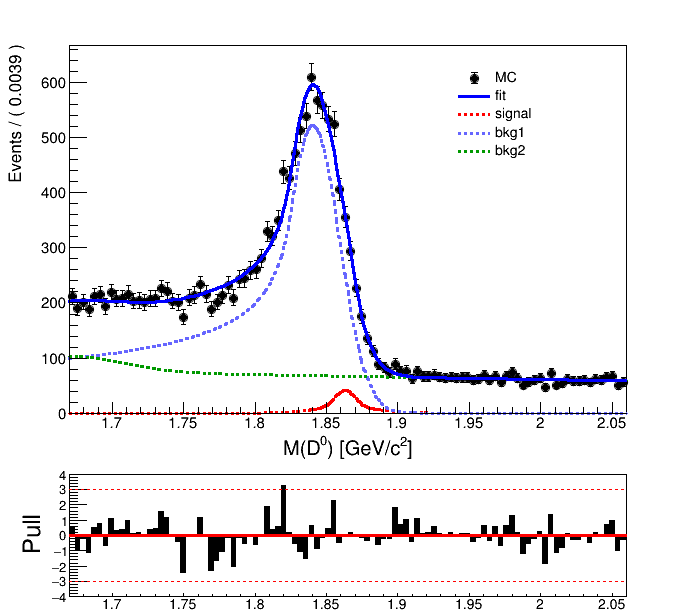

In [28]:
from IPython.display import Image
Image("test2_x_D0.png")


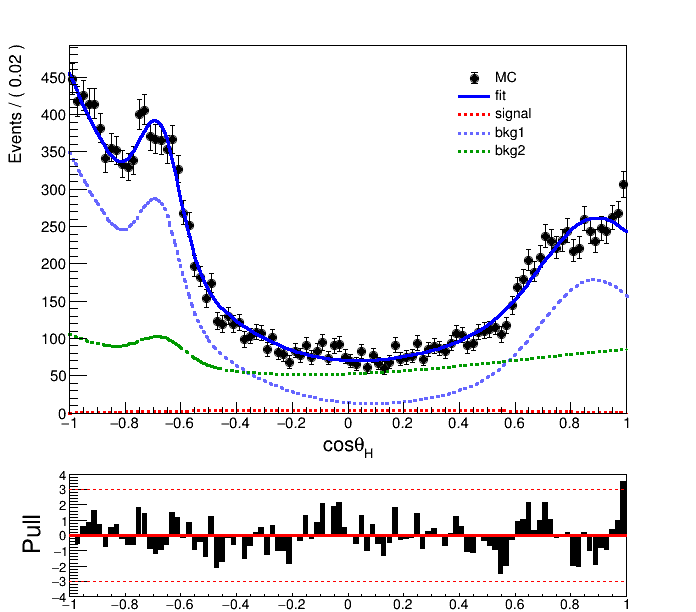

In [29]:
Image("test2_y_D0.png")

In [30]:
extended_model.Print("t")

0x55e858c0d060 RooAddPdf::extended_model = 0.107549 [Auto,Dirty] 
  0x55e85a104af0/V- RooProdPdf::sig_model = 0.979186 [Auto,Dirty] 
  RooProdPdf begin partial integral cache
  [0]0x55e85ae531f0 RooAddPdf::x_sig_model = 0.979186 [Auto,Dirty] 
  [0]  0x55e85aef7c70/V- RooGaussian::x_sig_1 = 0.995411 [Auto,Dirty] 
  [0]    0x55e85ac2a190/V- RooRealVar::M(D^{0}) = 1.865
  [0]    0x55e85ad82d30/V- RooRealVar::x_sig_mean = 1.86308 +/- 0.00221242
  [0]    0x55e85abca7f0/V- RooRealVar::x_sig_sigma1 = 0.02 +/- 0.00329276
  [0]  0x55e85872d070/V- RooRealVar::x_sigfrac = 0.538877 +/- 0.244876
  [0]  0x55e85ae6c940/V- RooCBShape::x_sig_2 = 0.960224 [Auto,Dirty] 
  [0]    0x55e85ac2a190/V- RooRealVar::M(D^{0}) = 1.865
  [0]    0x55e85ad82d30/V- RooRealVar::x_sig_mean = 1.86308 +/- 0.00221242
  [0]    0x55e8587419c0/V- RooRealVar::x_sig_sigma2 = 0.00673276 +/- 0.00214226
  [0]    0x55e85872bf50/V- RooRealVar::x_sig_alpha = 3.32125 +/- 6.11866
  [0]    0x55e850c81b80/V- RooRealVar::x_sig_n_CB = 1.02

In [31]:
print(nsig)
print(nbkg1)
print(nbkg2)
# print(nbkg3)

RooRealVar::nsig = 276.739 +/- 64.8121  L(0 - 18273) 

RooRealVar::nbkg1 = 10979.1 +/- 260.093  L(0 - 18273) 

RooRealVar::nbkg2 = 7017.13 +/- 237.484  L(0 - 18273) 



In [14]:
print(nsig)
print(nbkg1)
print(nbkg2)
# print(nbkg3)

RooRealVar::nsig = 361.844 +/- 73.2325  L(0 - 18273) 

RooRealVar::nbkg1 = 10892.4 +/- 253.9  L(0 - 18273) 

RooRealVar::nbkg2 = 7018.92 +/- 226.953  L(0 - 18273) 



In [15]:
print(nsig)
print(nbkg1)
print(nbkg2)
# print(nbkg3)

RooRealVar::nsig = 361.844 +/- 73.2325  L(0 - 18273) 

RooRealVar::nbkg1 = 10892.4 +/- 253.9  L(0 - 18273) 

RooRealVar::nbkg2 = 7018.92 +/- 226.953  L(0 - 18273) 



In [16]:
print(nsig)
print(nbkg1)
print(nbkg2)
# print(nbkg3)

RooRealVar::nsig = 361.844 +/- 73.2325  L(0 - 18273) 

RooRealVar::nbkg1 = 10892.4 +/- 253.9  L(0 - 18273) 

RooRealVar::nbkg2 = 7018.92 +/- 226.953  L(0 - 18273) 

